# Customer Churn Analysis in Banking, Finance and Businesses

Customer churn refers to the termination of a customer's relationship with a company, a pivotal concern in various industries, especially banking and finance. The ability to predict and prevent customer churn is crucial for retaining business and maximizing revenue potential.

In this project, we aim to address customer churn by leveraging churn analysis. Our goal is twofold: (a) predicting in advance which customers are likely to churn and (b) determining effective marketing actions to retain specific customers. This proactive approach has the potential to significantly impact revenue by identifying high-risk customers and implementing targeted retention strategies.

This project focuses on the predictive analytics aspect, aiming to develop models that can forecast customer churn, providing businesses with the foresight needed to take timely actions and enhance customer reteiness.



This project was reproduced using our own Machine Learning Models.

In [82]:
import pandas as pd
from IPython.display import display

# Load sample customer data
customer_data = pd.read_csv('ML portfolio/Artificial-Intelligence-for-Banking-master/99_sample_data/customerpreddata.csv')
# Drop rows with missing values
customer_data = customer_data.dropna()
# Display the first 10 rows of the customer data
print("Sample Customer Data:")
display(customer_data.head(10))

Sample Customer Data:


,AccountNo,Gender,Age,HouseType,ContactAvailability,HomeCountry,CreditScore,CardExpiryDate,TransactionCountry,LargePurchase,Product,TransactionCurrencyCode,date_diff,Card_Age,Week_Segment,TransactionAmount,lag_Datediff,lag_Txamt
0,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,0,300,WEEKDAY,12.400,0.0,3.100
1,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,0,305,WEEKEND,3.100,5.0,1.240
2,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,5,305,WEEKEND,1.240,2.0,6.200
3,1563687,Male,49,Owned,Low,Singapore,1,2003,Singapore,0,1,SGD,0,130,WEEKEND,10.044,256.0,8.680
5,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,25.420
6,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,25.420
7,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,17.050
8,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,17.050,109.0,4.743
9,7150411,Male,54,Owned,Medium,Singapore,1,2007,Singapore,0,1,SGD,0,93,WEEKEND,9.579,0.0,9.579
10,1100689,Male,6,Owned,Medium,Singapore,1,2007,Singapore,0,1,SGD,0,366,WEEKEND,31.000,39.0,37.200


In [122]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Use more descriptive variable names
feature_data = customer_data

# Drop the 'lag_Txamt' column
feature_data = feature_data.drop('lag_Txamt', axis=1)

# Remove rows with any missing values
feature_data = feature_data.dropna(how="any")

# Convert categorical columns to numerical codes
feature_data['Gender'] = pd.Categorical(feature_data.Gender).codes
feature_data['ContactAvailability'] = pd.Categorical(feature_data.ContactAvailability).codes
feature_data['HouseType'] = pd.Categorical(feature_data.HouseType).codes
feature_data['HomeCountry'] = pd.Categorical(feature_data.HomeCountry).codes
feature_data['TransactionCountry'] = pd.Categorical(feature_data.TransactionCountry).codes
feature_data['TransactionCurrencyCode'] = pd.Categorical(feature_data.TransactionCurrencyCode).codes
feature_data['Week_Segment'] = pd.Categorical(feature_data.Week_Segment).codes
feature_data['Product'] = pd.Categorical(feature_data.Product).codes

# Separate features (X) and target variable (Y)
X = feature_data.iloc[:-1, 1:15]  # Exclude the last row and the first column (account no)
Y = customer_data.iloc[:-1, -2]    # Use the last column 'lag_Datediff' as the target variable

# Print shapes to verify dimensions
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (138, 14)
Shape of Y: (138,)


In [123]:
display(X.head(10))
display(Y.head(10))


,Gender,Age,HouseType,ContactAvailability,HomeCountry,CreditScore,CardExpiryDate,TransactionCountry,LargePurchase,Product,TransactionCurrencyCode,date_diff,Card_Age,Week_Segment
0,0,56,0,1,0,1,1908,0,0,0,0,0,300,0
1,0,56,0,1,0,1,1908,0,0,0,0,0,305,1
2,0,56,0,1,0,1,1908,0,0,0,0,5,305,1
3,1,49,0,0,0,1,2003,0,0,0,0,0,130,1
5,1,57,0,1,0,1,2006,0,0,0,0,0,59,0
6,1,57,0,1,0,1,2006,0,0,0,0,0,59,0
7,1,57,0,1,0,1,2006,0,0,0,0,0,59,0
8,1,57,0,1,0,1,2006,0,0,0,0,0,59,0
9,1,54,0,1,0,1,2007,0,0,0,0,0,93,1
10,1,6,0,1,0,1,2007,0,0,0,0,0,366,1


0       0.0
1       5.0
2       2.0
3     256.0
5       0.0
6       0.0
7       0.0
8     109.0
9       0.0
10     39.0
Name: lag_Datediff, dtype: float64

Feature ranking:
1. Feature 3 (0.536139)
2. Feature 12 (0.261899)
3. Feature 1 (0.112239)
4. Feature 11 (0.053956)
5. Feature 6 (0.019022)
6. Feature 13 (0.013306)
7. Feature 0 (0.003439)


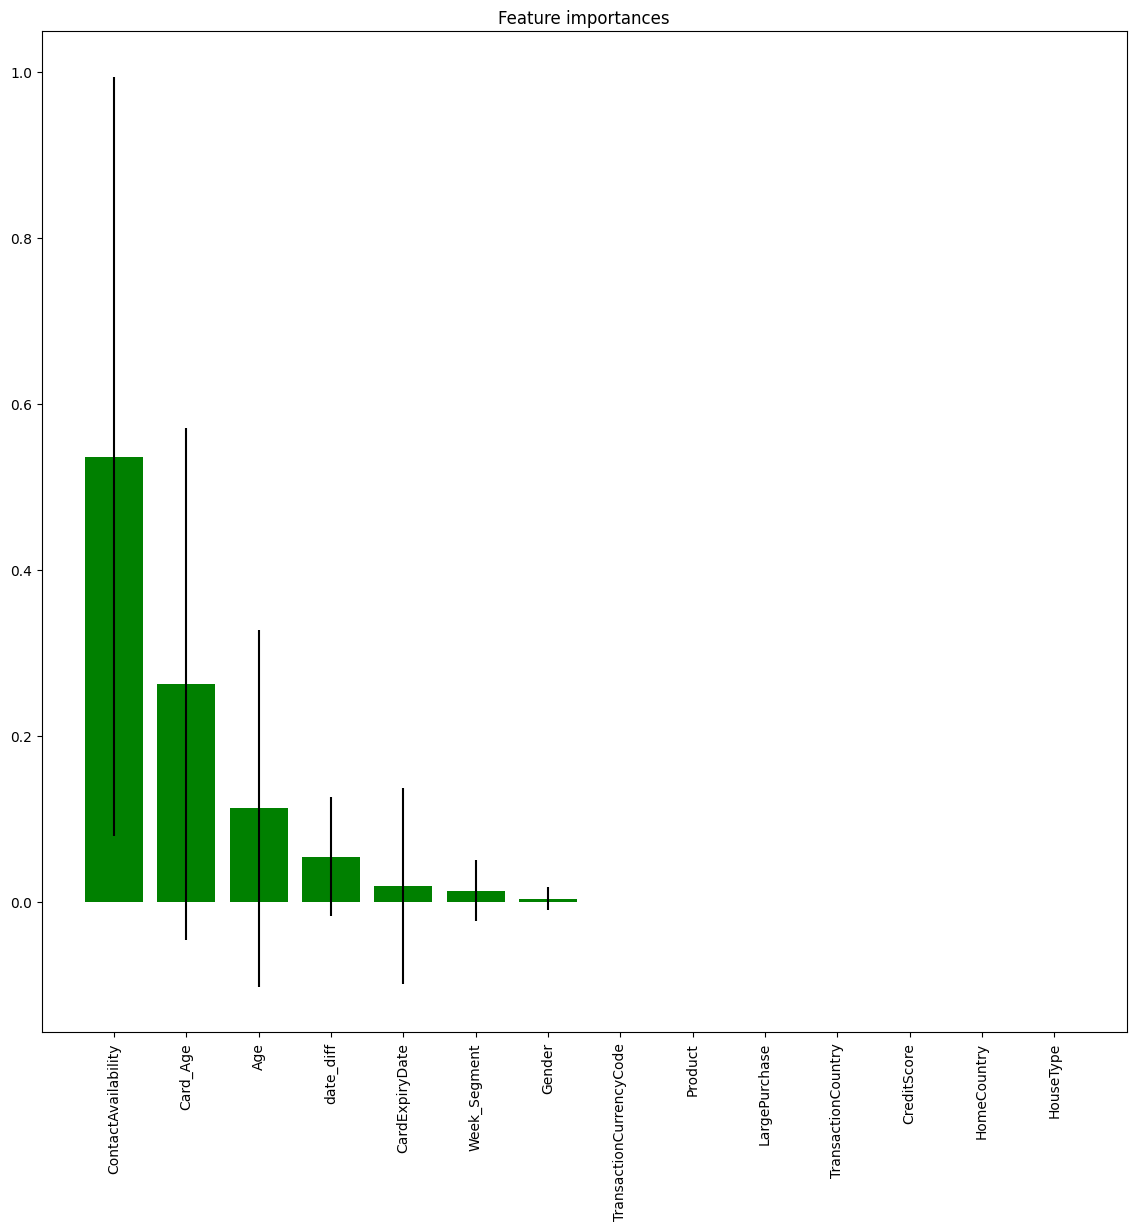

In [124]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
rf_regressor = RandomForestRegressor()

# Fit the regressor to the data
trained_regressor = rf_regressor.fit(X, Y)

# Extract feature importances
importances = trained_regressor.feature_importances_

# Calculate standard deviation of feature importances across trees
std_dev = np.std([tree.feature_importances_ for tree in trained_regressor.estimators_], axis=0)

# Get indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    if importances[indices[f]] != 0:
        print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="g", yerr=std_dev[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [125]:
# Assuming 'customer_data' is your dataset
X = feature_data.iloc[:-1, 1:15]  # Exclude the last row and the first column (account no)
Y = customer_data.iloc[:-1, -2]    # Use the last column 'lag_Datediff' as the target variable
display(X.head(10))
display(Y.head(10))

,Gender,Age,HouseType,ContactAvailability,HomeCountry,CreditScore,CardExpiryDate,TransactionCountry,LargePurchase,Product,TransactionCurrencyCode,date_diff,Card_Age,Week_Segment
0,0,56,0,1,0,1,1908,0,0,0,0,0,300,0
1,0,56,0,1,0,1,1908,0,0,0,0,0,305,1
2,0,56,0,1,0,1,1908,0,0,0,0,5,305,1
3,1,49,0,0,0,1,2003,0,0,0,0,0,130,1
5,1,57,0,1,0,1,2006,0,0,0,0,0,59,0
6,1,57,0,1,0,1,2006,0,0,0,0,0,59,0
7,1,57,0,1,0,1,2006,0,0,0,0,0,59,0
8,1,57,0,1,0,1,2006,0,0,0,0,0,59,0
9,1,54,0,1,0,1,2007,0,0,0,0,0,93,1
10,1,6,0,1,0,1,2007,0,0,0,0,0,366,1


0       0.0
1       5.0
2       2.0
3     256.0
5       0.0
6       0.0
7       0.0
8     109.0
9       0.0
10     39.0
Name: lag_Datediff, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

# Assuming 'customer_data' is your dataset
X = feature_data.iloc[:-1, 1:15]  # Exclude the last row and the first column (account no)
Y = customer_data.iloc[:-1, -2]    # Use the last column 'lag_Datediff' as the target variable

# Drop rows with missing values
data = pd.concat([X, Y], axis=1).dropna()

# Separate features into numerical and categorical
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# One-hot encode the categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data_encoded.iloc[:, :-1], data_encoded.iloc[:, -1], test_size=0.1, random_state=42)
Y_train = Y_train.astype('float32')

# Define and train a new model
new_model = Sequential()
new_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
new_model.add(Dense(units=32, activation='relu'))
new_model.add(Dense(units=1, activation='linear'))  # Use 'linear' activation for regression
new_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
new_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the new model on the testing set
test_loss, test_mae = new_model.evaluate(X_test, Y_test.astype('float32'))
print("Test Loss:", test_loss)
print("Test MAE (Mean Absolute Error):", test_mae)

# Predict using the new model
predicted_values = new_model.predict(X_test)

# Print some metrics or use them as needed
print("Predicted Values:", predicted_values)


Epoch 1/100
4/4 [==============================] - 1s 156ms/step - loss: 12526.8916 - mae: 98.0019 - val_loss: 1604.7922 - val_mae: 36.4763
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 3511.1609 - mae: 49.5833 - val_loss: 5498.2476 - val_mae: 66.1315
Epoch 3/100
4/4 [==============================] - 0s 27ms/step - loss: 4750.9448 - mae: 60.2663 - val_loss: 1457.6321 - val_mae: 34.7744
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 1495.7329 - mae: 28.1272 - val_loss: 764.4232 - val_mae: 20.5098
Epoch 5/100
4/4 [==============================] - 0s 28ms/step - loss: 1562.1394 - mae: 28.4970 - val_loss: 765.6900 - val_mae: 21.9027
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 1148.6107 - mae: 22.4669 - val_loss: 236.6705 - val_mae: 13.0974
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 850.0959 - mae: 17.7792 - val_loss: 475.5201 - val_mae: 19.7886
Epoch 8/100
4/4 [====================

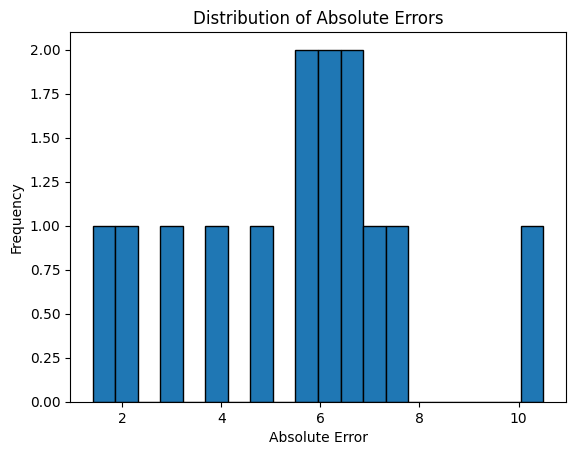

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming actual_values contains the true lag_Datediff values
actual_values = Y_test.values  # Use Y.values to get the NumPy array

# Calculate absolute errors
absolute_errors = np.abs(predicted_values[:, 0] - actual_values)

# Plot the distribution of absolute errors
plt.hist(absolute_errors, bins=20, edgecolor='black')
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

In [135]:
# Apply churn assessment rule
churn_threshold = 7.0  # You can adjust this threshold based on your specific problem

for predicted_amount in predicted_values:
    if predicted_amount > churn_threshold:
        print(f'Predicted Transaction Amount: {predicted_amount[0]}, Customer is likely to churn.')
    else:
        print(f'Predicted Transaction Amount: {predicted_amount[0]}, Customer is active.')


Predicted Transaction Amount: 5.854546070098877, Customer is active.
Predicted Transaction Amount: 7.2760396003723145, Customer is likely to churn.
Predicted Transaction Amount: 10.503911018371582, Customer is likely to churn.
Predicted Transaction Amount: 7.596008777618408, Customer is likely to churn.
Predicted Transaction Amount: 4.918201923370361, Customer is active.
Predicted Transaction Amount: 6.335503101348877, Customer is active.
Predicted Transaction Amount: 5.936882495880127, Customer is active.
Predicted Transaction Amount: 7.302261829376221, Customer is likely to churn.
Predicted Transaction Amount: 7.401672840118408, Customer is likely to churn.
Predicted Transaction Amount: 6.7925496101379395, Customer is active.
Predicted Transaction Amount: 6.512283802032471, Customer is active.
Predicted Transaction Amount: 4.837543964385986, Customer is active.
Predicted Transaction Amount: 6.286266803741455, Customer is active.
Predicted Transaction Amount: 6.2904133796691895, Custo

In [139]:
# Assuming 'customer_data' is your original dataset
account_numbers_test = customer_data.iloc[X_test.index]['AccountNo']

# Apply churn assessment rule
churn_threshold = 7.0  # You can adjust this threshold based on your specific problem

for account_number, predicted_amount in zip(account_numbers_test, predicted_values):
    if predicted_amount > churn_threshold:
        print(f'Account Number: {account_number}, Predicted Transaction Amount: {predicted_amount[0]}, Customer is likely to churn.')
    else:
        print(f'Account Number: {account_number}, Predicted Transaction Amount: {predicted_amount[0]}, Customer is active.')


Account Number: 1100689, Predicted Transaction Amount: 5.854546070098877, Customer is active.
Account Number: 1100689, Predicted Transaction Amount: 7.2760396003723145, Customer is likely to churn.
Account Number: 1100689, Predicted Transaction Amount: 10.503911018371582, Customer is likely to churn.
Account Number: 1100689, Predicted Transaction Amount: 7.596008777618408, Customer is likely to churn.
Account Number: 1100689, Predicted Transaction Amount: 4.918201923370361, Customer is active.
Account Number: 1100689, Predicted Transaction Amount: 6.335503101348877, Customer is active.
Account Number: 1100689, Predicted Transaction Amount: 5.936882495880127, Customer is active.
Account Number: 1100689, Predicted Transaction Amount: 7.302261829376221, Customer is likely to churn.
Account Number: 1100689, Predicted Transaction Amount: 7.401672840118408, Customer is likely to churn.
Account Number: 1100689, Predicted Transaction Amount: 6.7925496101379395, Customer is active.
Account Numb

# Conclusion

Understanding and predicting customer churn is crucial for organizations to effectively retain customers and manage costs associated with customer acquisition. By analyzing churn time and customer lifetime value (CLV), businesses can categorize customers and prioritize efforts to retain them. This involves identifying customers who are likely to churn in the near term and those who may pose a risk in the future.

Recommendation systems play a key role in reducing churn by providing personalized suggestions to customers. When customers act on these recommendations, it contributes to customer retention and enhances their overall experience. This proactive approach allows organizations to tailor their marketing efforts and resources to specific customer segments, ultimately improving customer survival rates.

In conclusion, customer churn analysis provides valuable insights that guide strategic decision-making. As organizations gather more information about their customers, predictive models evolve and become more accurate. The continuous refinement of these models enables businesses to adapt and implement targeted strategies, ultimately fostering customer loyalty and maximizing the effectiveness of marketing initiatives.